In [7]:
import cv2
from src.utils.func import (crop_center, read_image_as_numpyimage, get_corners,)
from src.utils.playfield_finder import PlayfieldFinder
import numpy as np
from src.utils.plotting import display_img, plot_on_image
import src.config
from src.utils.metrics import iou
from src.utils.intersections import compute_intersections
from src.utils.annotations import transform_annotation
from pathlib import Path
import pandas as pd
from src.utils.annotations import PolygonAnnotation
import matplotlib.pyplot as plt

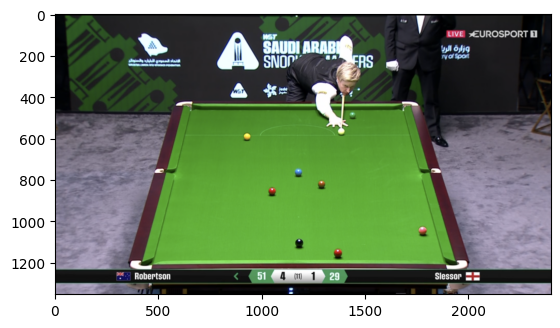

[y = 0.0 * x + 1192.0, y = 0.0 * x + 449.0, y = -4.051282051282051 * x + 3111.948717948718, y = 3.7264150943396226 * x + -5804.292452830188]


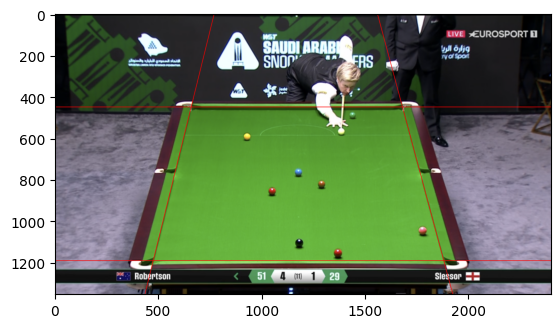

In [13]:
picname = 'test8'
pic = read_image_as_numpyimage(f'/home/polymorvic/Pictures/Screenshots/{picname}.png', 'rgb')
# pic = read_image_as_numpyimage(f'pics/{picname}.png', 'rgb') 
cropped_pic = crop_center(pic)

display_img(pic)

finder = PlayfieldFinder(pic)
bottom_cushion = finder.find_bottom_internal_cushion()
top_cushion = finder.find_top_internal_cushion()
side_lines = finder.find_internal_side_cushions()
bottom_cushion, top_cushion, *side_lines

# compute_intersections([bottom_cushion, top_cushion, *side_lines], pic)

print([bottom_cushion, top_cushion, *side_lines])

for line in [bottom_cushion, top_cushion, *side_lines]:
    cv2.line(pic, *line.limit_to_img(pic), (255, 0, 0), 2)
display_img(pic)

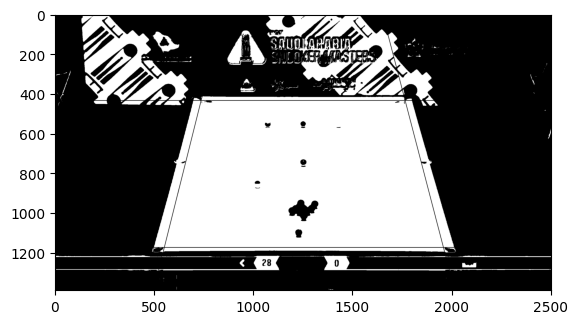

In [9]:
hsv = cv2.cvtColor(pic, cv2.COLOR_BGR2HSV)

# Szeroki zakres zieleni (OpenCV: H 0-179, S 0-255, V 0-255)
# Zielony zwykle ~35-85, tu szerzej:
lower_green = np.array([25, 40, 40])   # H, S, V
upper_green = np.array([95, 255, 255])

# Binaryzacja (maska 0/255)
mask = cv2.inRange(hsv, lower_green, upper_green)
display_img(mask)